<a href="https://colab.research.google.com/github/chitralekha13/IIITD-MIDAS/blob/main/product.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data cleansing of the given appstore_games dataSet
import pandas as pd
from google.colab import files
import os
import numpy as np
import tensorflow.compat.v1 as tf
import seaborn as sns
import matplotlib.pyplot as plt
import re

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet

import sys
import warnings
import random

if not sys.warnoptions:
    warnings.simplefilter("ignore")
tf.disable_v2_behavior()

#uploaded = files.upload()

In [ ]:
data = pd.read_csv("dataset.csv")

FileNotFoundError: ignored

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#import io
  
#data = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
data.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
#dropping all the unnecessary coloumns
data.drop("uniq_id", inplace=True, axis=1)
data.drop("crawl_timestamp", inplace=True, axis=1)
data.drop("product_url", inplace=True, axis=1)
data.drop("retail_price", inplace=True, axis=1)
data.drop("discounted_price", inplace=True, axis=1)
data.drop("image", inplace=True, axis=1)
data.drop("is_FK_Advantage_product", inplace=True, axis=1)
data.drop("product_rating", inplace=True, axis=1)
data.drop("overall_rating", inplace=True, axis=1)
data.drop("product_specifications", inplace=True, axis=1)

In [ ]:
data.head()


,product_name,product_category_tree,pid,description,brand
0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,Key Features of Alisha Solid Women's Cycling S...,Alisha
1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor
2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,Key Features of AW Bellies Sandals Wedges Heel...,AW
3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,Key Features of Alisha Solid Women's Cycling S...,Alisha
4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,Specifications of Sicons All Purpose Arnica Do...,Sicons


In [ ]:
data.shape
data.dropna

<bound method DataFrame.dropna of                                   product_name  ...             brand
0          Alisha Solid Women's Cycling Shorts  ...            Alisha
1          FabHomeDecor Fabric Double Sofa Bed  ...      FabHomeDecor
2                                   AW Bellies  ...                AW
3          Alisha Solid Women's Cycling Shorts  ...            Alisha
4        Sicons All Purpose Arnica Dog Shampoo  ...            Sicons
...                                        ...  ...               ...
19995           WallDesign Small Vinyl Sticker  ...        WallDesign
19996  Wallmantra Large Vinyl Stickers Sticker  ...        Wallmantra
19997  Elite Collection Medium Acrylic Sticker  ...  Elite Collection
19998  Elite Collection Medium Acrylic Sticker  ...  Elite Collection
19999  Elite Collection Medium Acrylic Sticker  ...  Elite Collection

[20000 rows x 5 columns]>

In [ ]:
def clean_alt_list(list_):
    
    list_ = list_.replace('>>', ' ')
    list_ = list_.replace('["', ' ')
    
    list_ = list_.replace('"]', ' ')
    
    list_ = list_.replace(',', ' ')
    list_ = list(list_.split(" "))
    list_ = list_[1]

    return list_

In [ ]:
df = data.copy()
df['product_category_tree'] = df['product_category_tree'].apply(clean_alt_list)
#df['product_category_tree'] = df['product_category_tree'].str.replace('[', ' ')
#df['product_category_tree'] = df['product_category_tree'].str.replace('[', ' ')
#df['product_category_tree'] = df['product_category_tree'].str.split()
#df['product_category_treee'] = df['product_category_tree'].strip(' ')
#data1['product_category_treee'] = data1['product_category_treee'].map(lambda x: x[0])
df.tail(100)

,product_name,product_category_tree,pid,description,brand
19900,Uberlyfe Extra Large Pigmented Polyvinyl Films...,Baby,STIE5UVGW2JWVWCT,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,Uberlyfe
19901,La Isla Women Heels,Footwear,SNDEY7QPXUF5PZSZ,Flipkart.com: Buy La Isla Women Heels only for...,NaN
19902,Wallmantra Medium Vinyl Sticker Sticker,Baby,STIEC889ZGFD3RCE,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,Wallmantra
19903,Fun To See Reusable Sticker,Baby,STIE2KFZTQFVYZQQ,Buy Fun To See Reusable Sticker for Rs.1099 on...,Fun To See
19904,WallDesign Small Vinyl Sticker,Baby,STIE7KFGSBYBQG8U,Buy WallDesign Small Vinyl Sticker for Rs.530 ...,WallDesign
...,...,...,...,...,...
19995,WallDesign Small Vinyl Sticker,Baby,STIE7KFJAKSTDY9G,Buy WallDesign Small Vinyl Sticker for Rs.730 ...,WallDesign
19996,Wallmantra Large Vinyl Stickers Sticker,Baby,STIE9F5URNQGJCGH,Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra
19997,Elite Collection Medium Acrylic Sticker,Baby,STIE7VAYDKQZEBSD,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection
19998,Elite Collection Medium Acrylic Sticker,Baby,STIE8YSVEPPCZ42Y,Buy Elite Collection Medium Acrylic Sticker fo...,Elite Collection


In [ ]:
#df.head()

In [ ]:
#data.head()

In [ ]:
Non_Main_Genres = df[~df.product_category_tree.str.contains('Clothing') & \
                    ~df.product_category_tree.str.contains('Pens') & \
                    ~df.product_category_tree.str.contains('Automotive	') & \
                    ~df.product_category_tree.str.contains('Tools') & \
                    ~df.product_category_tree.str.contains('Beauty') & \
                    ~df.product_category_tree.str.contains('Home') & \
                    ~df.product_category_tree.str.contains('Jewellery') & \
                    ~df.product_category_tree.str.contains('Sports') & \
                    ~df.product_category_tree.str.contains('Baby') & \
                    ~df.product_category_tree.str.contains('Gaming') & \
                    ~df.product_category_tree.str.contains('Bags') & \
                    ~df.product_category_tree.str.contains('Computers') & \
                    ~df.product_category_tree.str.contains('Kitchen') & \
                    ~df.product_category_tree.str.contains('Mobiles') & \
                    ~df.product_category_tree.str.contains('Footwear') & \
                    ~df.product_category_tree.str.contains('Watches') ].index
df.drop(Non_Main_Genres , inplace = True)


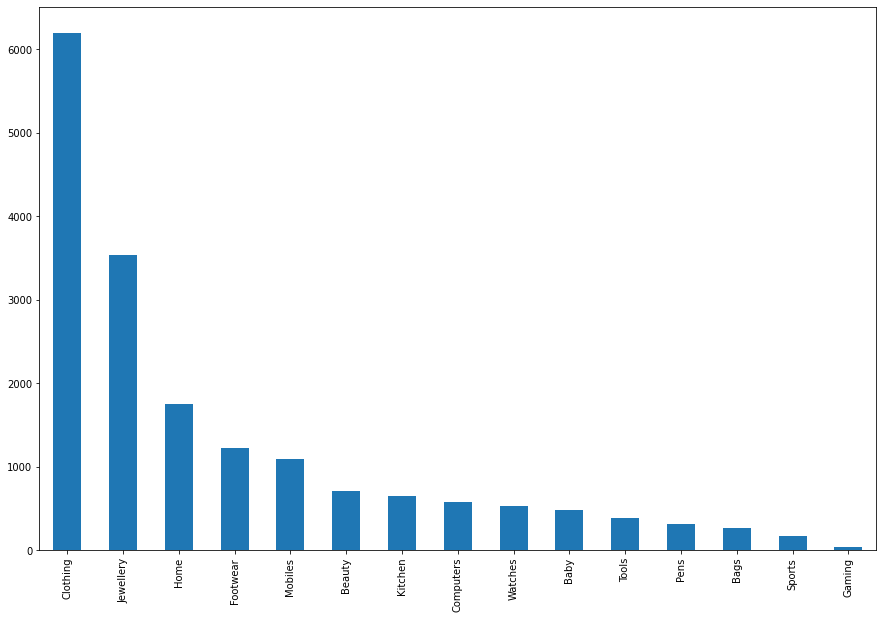

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
df['product_category_tree'].value_counts().plot.bar()
plt.show()

In [ ]:
df.shape

(17926, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in ['pid']:
    
    le = LabelEncoder()
    le.fit(list(df[col]))
    df[col] = le.transform(df[col])
   
    

In [ ]:
df.head(10)

,product_name,product_category_tree,pid,brand,Item_Description_Preprocessed
0,Alisha Solid Women's Cycling Shorts,3,14473,Alisha,key features alisha solid women cycling shorts...
2,AW Bellies,5,12667,AW,key features aw bellies sandals wedges heel ca...
3,Alisha Solid Women's Cycling Shorts,3,14470,Alisha,key features alisha solid women cycling shorts...
6,Alisha Solid Women's Cycling Shorts,3,14476,Alisha,key features alisha solid women cycling shorts...
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals",5,12665,dilli bazaaar,key features dilli bazaaar bellies corporate c...
9,Alisha Solid Women's Cycling Shorts,3,14475,Alisha,key features alisha solid women cycling shorts...
10,Ladela Bellies,5,12668,Ladela,key features ladela bellies brand ladela color...
11,Carrel Printed Women's,3,14883,Carrel,key features carrel printed women fabric swiml...
13,Alisha Solid Women's Cycling Shorts,3,14474,Alisha,key features alisha solid women cycling shorts...
14,Freelance Vacuum Bottles 350 ml Bottle,11,2732,Freelance,specifications freelance vacuum bottles ml bot...


In [ ]:
sent_0 = df['description'].values[0]
print(sent_0)
print("="*50)

Key Features of Alisha Solid Women's Cycling Shorts Cotton Lycra Navy, Red, Navy,Specifications of Alisha Solid Women's Cycling Shorts Shorts Details Number of Contents in Sales Package Pack of 3 Fabric Cotton Lycra Type Cycling Shorts General Details Pattern Solid Ideal For Women's Fabric Care Gentle Machine Wash in Lukewarm Water, Do Not Bleach Additional Details Style Code ALTHT_3P_21 In the Box 3 shorts


In [ ]:
import re
import nltk
nltk.download('stopwords')
sw_list = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['description']= df['description'].astype(str)

In [ ]:
type(df['description'])

pandas.core.series.Series

In [ ]:
from tqdm import tqdm
import re
preprocessed_text = []
# tqdm is for printing the status bar
for sentence in tqdm(df['description'].values):
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    
    sentence = ' '.join(e.lower() for e in sentence.split() if e.lower() not in sw_list)
    preprocessed_text.append(sentence.strip())

100%|██████████| 17926/17926 [00:04<00:00, 3770.61it/s]


In [ ]:
df['Item_Description_Preprocessed']=preprocessed_text
df.drop('description',axis=1,inplace=True)

In [ ]:
df.head(20)

,product_name,product_category_tree,pid,brand,Item_Description_Preprocessed
0,Alisha Solid Women's Cycling Shorts,3,SRTEH2FF9KEDEFGF,Alisha,key features alisha solid women cycling shorts...
2,AW Bellies,5,SHOEH4GRSUBJGZXE,AW,key features aw bellies sandals wedges heel ca...
3,Alisha Solid Women's Cycling Shorts,3,SRTEH2F6HUZMQ6SJ,Alisha,key features alisha solid women cycling shorts...
6,Alisha Solid Women's Cycling Shorts,3,SRTEH2FVVKRBAXHB,Alisha,key features alisha solid women cycling shorts...
8,"dilli bazaaar Bellies, Corporate Casuals, Casuals",5,SHOEH3DZBFR88SCK,dilli bazaaar,key features dilli bazaaar bellies corporate c...
9,Alisha Solid Women's Cycling Shorts,3,SRTEH2FVUHAAVH9X,Alisha,key features alisha solid women cycling shorts...
10,Ladela Bellies,5,SHOEH4KM2W3Z6EH5,Ladela,key features ladela bellies brand ladela color...
11,Carrel Printed Women's,3,SWIEHF3EF5PZAZUY,Carrel,key features carrel printed women fabric swiml...
13,Alisha Solid Women's Cycling Shorts,3,SRTEH2FGBDJGX8FW,Alisha,key features alisha solid women cycling shorts...
14,Freelance Vacuum Bottles 350 ml Bottle,11,BOTEGYTZ2T6WUJMM,Freelance,specifications freelance vacuum bottles ml bot...


In [ ]:
import string
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

In [ ]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10)
tf_idf_vect.fit(preprocessed_text)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

final_tf_idf = tf_idf_vect.transform(preprocessed_text)
print("the type of count vectorizer ",type(final_tf_idf))
print("the shape of out text TFIDF vectorizer ",final_tf_idf.get_shape())
print("the number of unique words including both unigrams and bigrams ", final_tf_idf.get_shape()[1])

some sample features(unique words in the corpus) ['aa', 'aaishwarya', 'aaradhi', 'aaradhi divya', 'ability', 'able', 'able large', 'abode', 'abode order', 'abrasion']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (17926, 10655)
the number of unique words including both unigrams and bigrams  10655


In [ ]:
target = LabelEncoder()
y_endoded = target.fit_transform(df['product_category_tree'])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(final_tf_idf,y_endoded, test_size=0.2, random_state=1)

In [ ]:
import xgboost as xgb
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['num_class'] = len(target.classes_)
param['eval_metric'] = ['mlogloss']
param['seed'] = 1

dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

evallist = [(dtrain, 'train'), (dvalid, 'eval')]

clf = xgb.train(param, dtrain, 100, evallist, verbose_eval=50)

[0]	train-mlogloss:2.08547	eval-mlogloss:2.09131
[50]	train-mlogloss:0.07195	eval-mlogloss:0.136769
[99]	train-mlogloss:0.023415	eval-mlogloss:0.100278


In [ ]:
y_pred_valid = clf.predict(dvalid)

print("Accuracy : ",accuracy_score(y_valid, np.argmax(y_pred_valid, axis=1)))

Accuracy :  0.9768544339096487


NameError: ignored

In [ ]:
train.head()

NameError: ignored

In [ ]:

all_text = list(df['description'][...])
all_cate = np.array(df['product_category_tree'].tolist())

In [ ]:
def clean_str(string):
    """
    String cleaning .
    """
    string = re.sub(r"[^A-Za-z0-9]", " ", string) # remove unused charactor other than english letter and number, use space to replace
    return string.strip() 

In [ ]:
def get_wordnet_pos(treebank_tag):
    """
    Return the POS of each word for later usage .
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [ ]:
def text_lemmatization(l,lemmatizer,t_text, word_count):
    """
    Tokenization: Split the text into words. 
    Lemmatize the text .
    """
    for i in range(len(t_text)):
        text_clean = clean_str(t_text[i])     # clean texts, remove useless symbols
        text_word = word_tokenize(text_clean) # set each individual token
        text_pos = pos_tag(text_word)         # pos tagging each token [word,POS]
        text_lemma = ""
        for item in text_pos:                 # lemmatizing each token
            # Put each word after lemmatization into the list
            text_lemma = text_lemma + " " + (lemmatizer.lemmatize(item[0],get_wordnet_pos(item[1])))     
        l.append(text_lemma.strip())          # append the preprocessed sample to x_train list, remove the space
        word_count.append(len(text_pos))
    return l, word_count 

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# preprocessing
text = list()
word_count = list()                   #statistics how many words in each sample
lemmatizer = WordNetLemmatizer()      # model used to lemmatize word (defined by package nltk)
text_lemmatized, word_count = text_lemmatization(text,lemmatizer,all_text, word_count)

TypeError: ignored